# Working on Iris Dataset with Pandas

In [21]:
import pandas as pd
from sklearn import datasets
import numpy as np
from scipy.stats import norm

# Load Iris dataset

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [57]:
columnNames = [' '.join(f.split()[:-1]) for f in iris['feature_names']]
df = pd.DataFrame(iris['data'], columns=columnNames)
df['target'] = iris['target']

In [68]:
df[:50].sample(10)
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


sepal length    150
sepal width     150
petal length    150
petal width     150
target          150
dtype: int64

In [76]:
df.drop('target', axis=1).describe().round(2)

,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [74]:
df.drop('target', axis=1).corr(method='pearson')

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


In [24]:
mu = df['sepal length'].mean()
sigma = df['sepal length'].std(ddof = 1)

df['P(x<=sepal length)'] = df['sepal length'].apply(lambda x: norm.cdf(x, loc=mu, scale=sigma))

df[['sepal length', 'P(x<=sepal length)']].head()

,sepal length,P(x<=sepal length)
0,5.1,0.184680
1,4.9,0.127310
2,4.7,0.083681
3,4.6,0.066614
4,5.0,0.154235


In [25]:
df.groupby('target')['petal length'].agg([np.mean, np.std, lambda x: np.mean(x)+1])

,mean,std,<lambda_0>
target,,,
0,1.462,0.173664,2.462
1,4.260,0.469911,5.260
2,5.552,0.551895,6.552


# Exercise 1

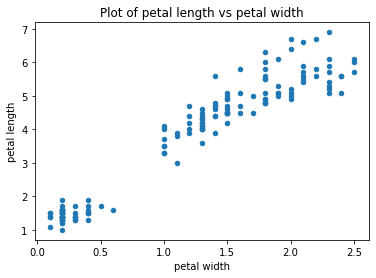

In [72]:
df.plot.scatter(x='petal width', y='petal length', title='Plot of petal length vs petal width')

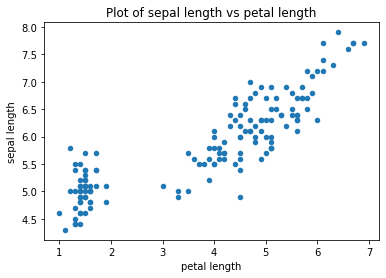

In [70]:
df.plot.scatter(x='petal length', y='sepal length', title='Plot of sepal length vs petal length')

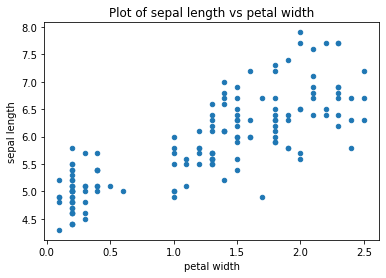

In [71]:
df.plot.scatter(x='petal width', y='sepal length', title='Plot of sepal length vs petal width')

# Challenge